<a href="https://colab.research.google.com/github/KIQVinicius/Data-Science/blob/master/N%C3%A3o_Supervisionados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
url_films = "https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv"

In [3]:
films = pd.read_csv(url_films)

In [4]:
films.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
genres = films['genres'].str.get_dummies()

In [8]:
dataset = pd.concat([films,genres],axis=1 )
dataset.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
scaler = StandardScaler()

In [10]:
scaled_genres = scaler.fit_transform(genres)

In [11]:
scaled_genres

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [25]:
modelo = KMeans(n_clusters=15)

In [26]:
modelo.fit(scaled_genres)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=15, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [27]:
modelo.cluster_centers_

array([[-0.05917995, -0.42026744, -0.26986852, -0.21177208, -0.26722785,
         0.45629313, -0.33012259, -0.21748944,  0.30867242, -0.07018601,
        -0.09492563, -0.3340552 , -0.12839708, -0.18841895, -0.24998637,
         2.25920562, -0.24531185, -0.41530992, -0.20201972, -0.13206534],
       [-0.05917995,  0.53348602, -0.23777363, -0.22135362, -0.26596256,
        -0.15298423,  2.66928909, -0.21748944,  0.2190273 , -0.24893308,
        -0.09492563, -0.32276254, -0.12839708, -0.18841895, -0.24998637,
        -0.31120916, -0.27426183,  0.64925149, -0.20201972, -0.13206534],
       [-0.05917995, -0.30576849, -0.29389524, -0.14317469, -0.27045122,
         1.26242494, -0.37463158, -0.21748944, -0.31476503, -0.17865548,
        -0.09492563, -0.3340552 , -0.12839708, -0.18841895, -0.24998637,
        -0.44263346, -0.23551278, -0.42639246, -0.20201972, -0.13206534],
       [-0.05917995, -0.30942238, -0.28458894, -0.13125222, -0.27045122,
        -0.7921263 , -0.37463158, -0.21748944,  

In [28]:
groups = pd.DataFrame(modelo.cluster_centers_, columns=genres.columns )
groups = groups.transpose()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1e62885cf8>,
      dtype=object)

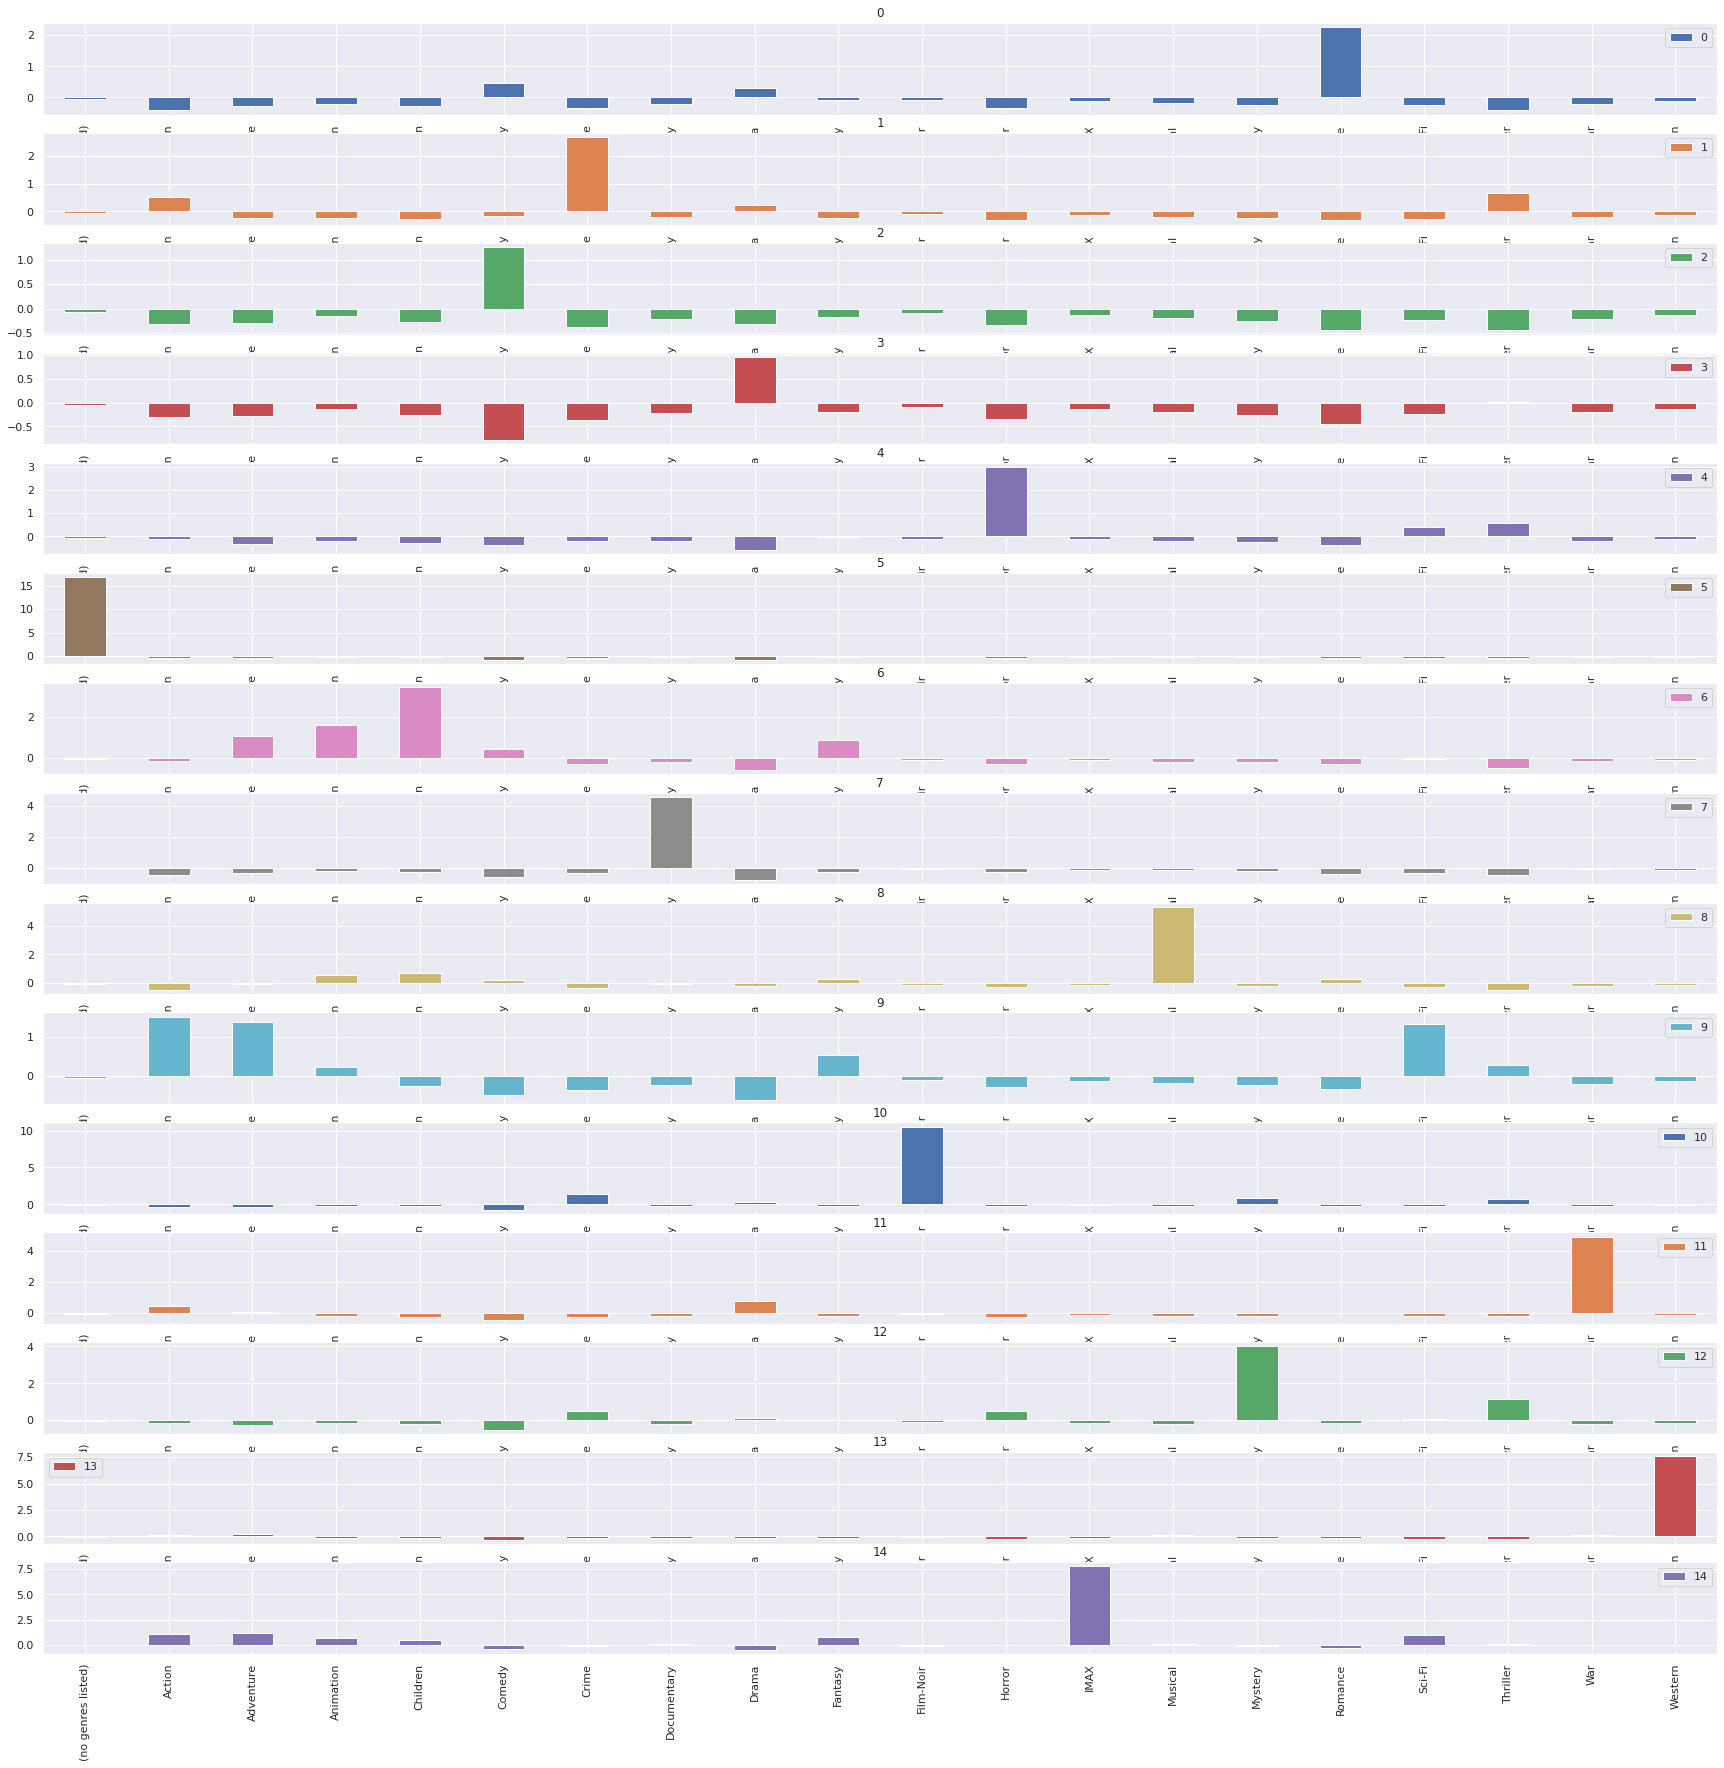

In [29]:
groups.plot.bar(subplots = True, figsize = (30, 30), sharex =False )

In [30]:
from sklearn.manifold import TSNE

In [31]:
tsne = TSNE()

In [32]:
visualizacao = tsne.fit_transform(scaled_genres)

In [33]:
import seaborn as sns

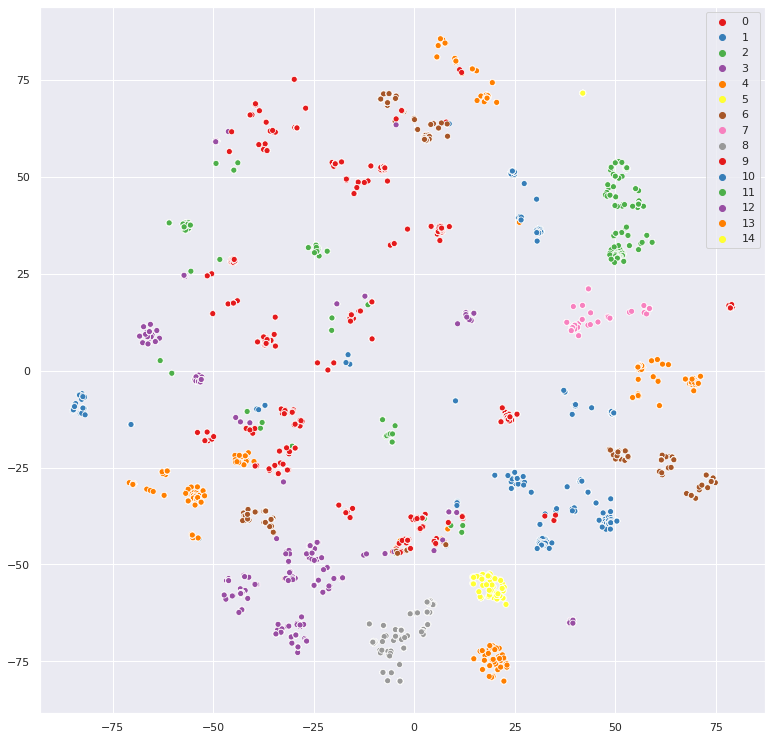

In [35]:
sns.set(rc={'figure.figsize': (13, 13)})
sns.scatterplot(x = visualizacao[:,0], y = visualizacao[:,1], hue =modelo.labels_, palette=sns.color_palette('Set1', 15) )

In [36]:
def KMeansOtimization(num_clusters, classe):
  model = KMeans(n_clusters = num_clusters)
  model.fit(classe)
  return [num_clusters, model.inertia_]

In [37]:
result = [KMeansOtimization(clusters,scaled_genres) for clusters in range(1, 40)]
result = pd.DataFrame(result,columns=['Cluster', 'Erro'])

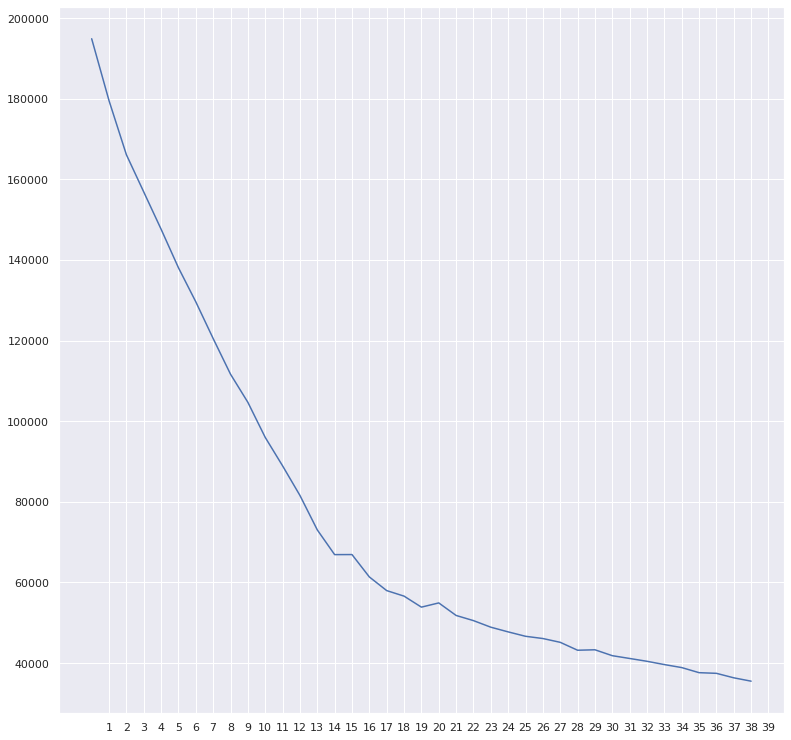

In [38]:
result['Erro'].plot(xticks =result['Cluster'])

In [41]:
from sklearn.cluster import AgglomerativeClustering

In [43]:
modelo = AgglomerativeClustering(n_clusters=17)
grupos = modelo.fit_predict(scaled_genres)
grupos

array([ 5, 14, 13, ...,  2,  5,  3])

In [44]:
visualizacap = tsne.fit_transform(scaled_genres)

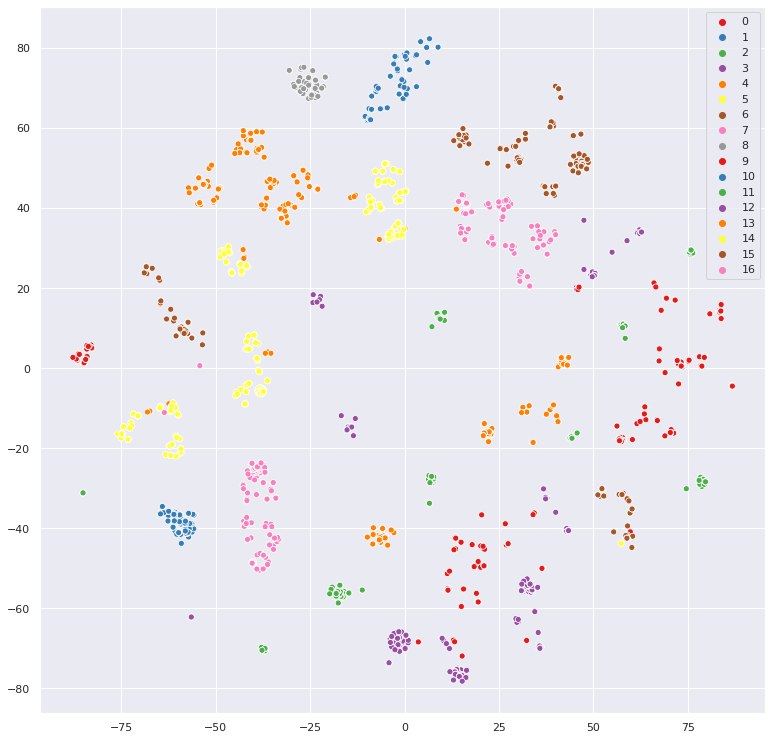

In [45]:
sns.scatterplot(x = visualizacap[:,0], y = visualizacap[:,1], hue =modelo.labels_, palette=sns.color_palette('Set1', 17) )

In [46]:
from scipy.cluster.hierarchy import dendrogram, linkage

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1e6070cdd8>,
      dtype=object)

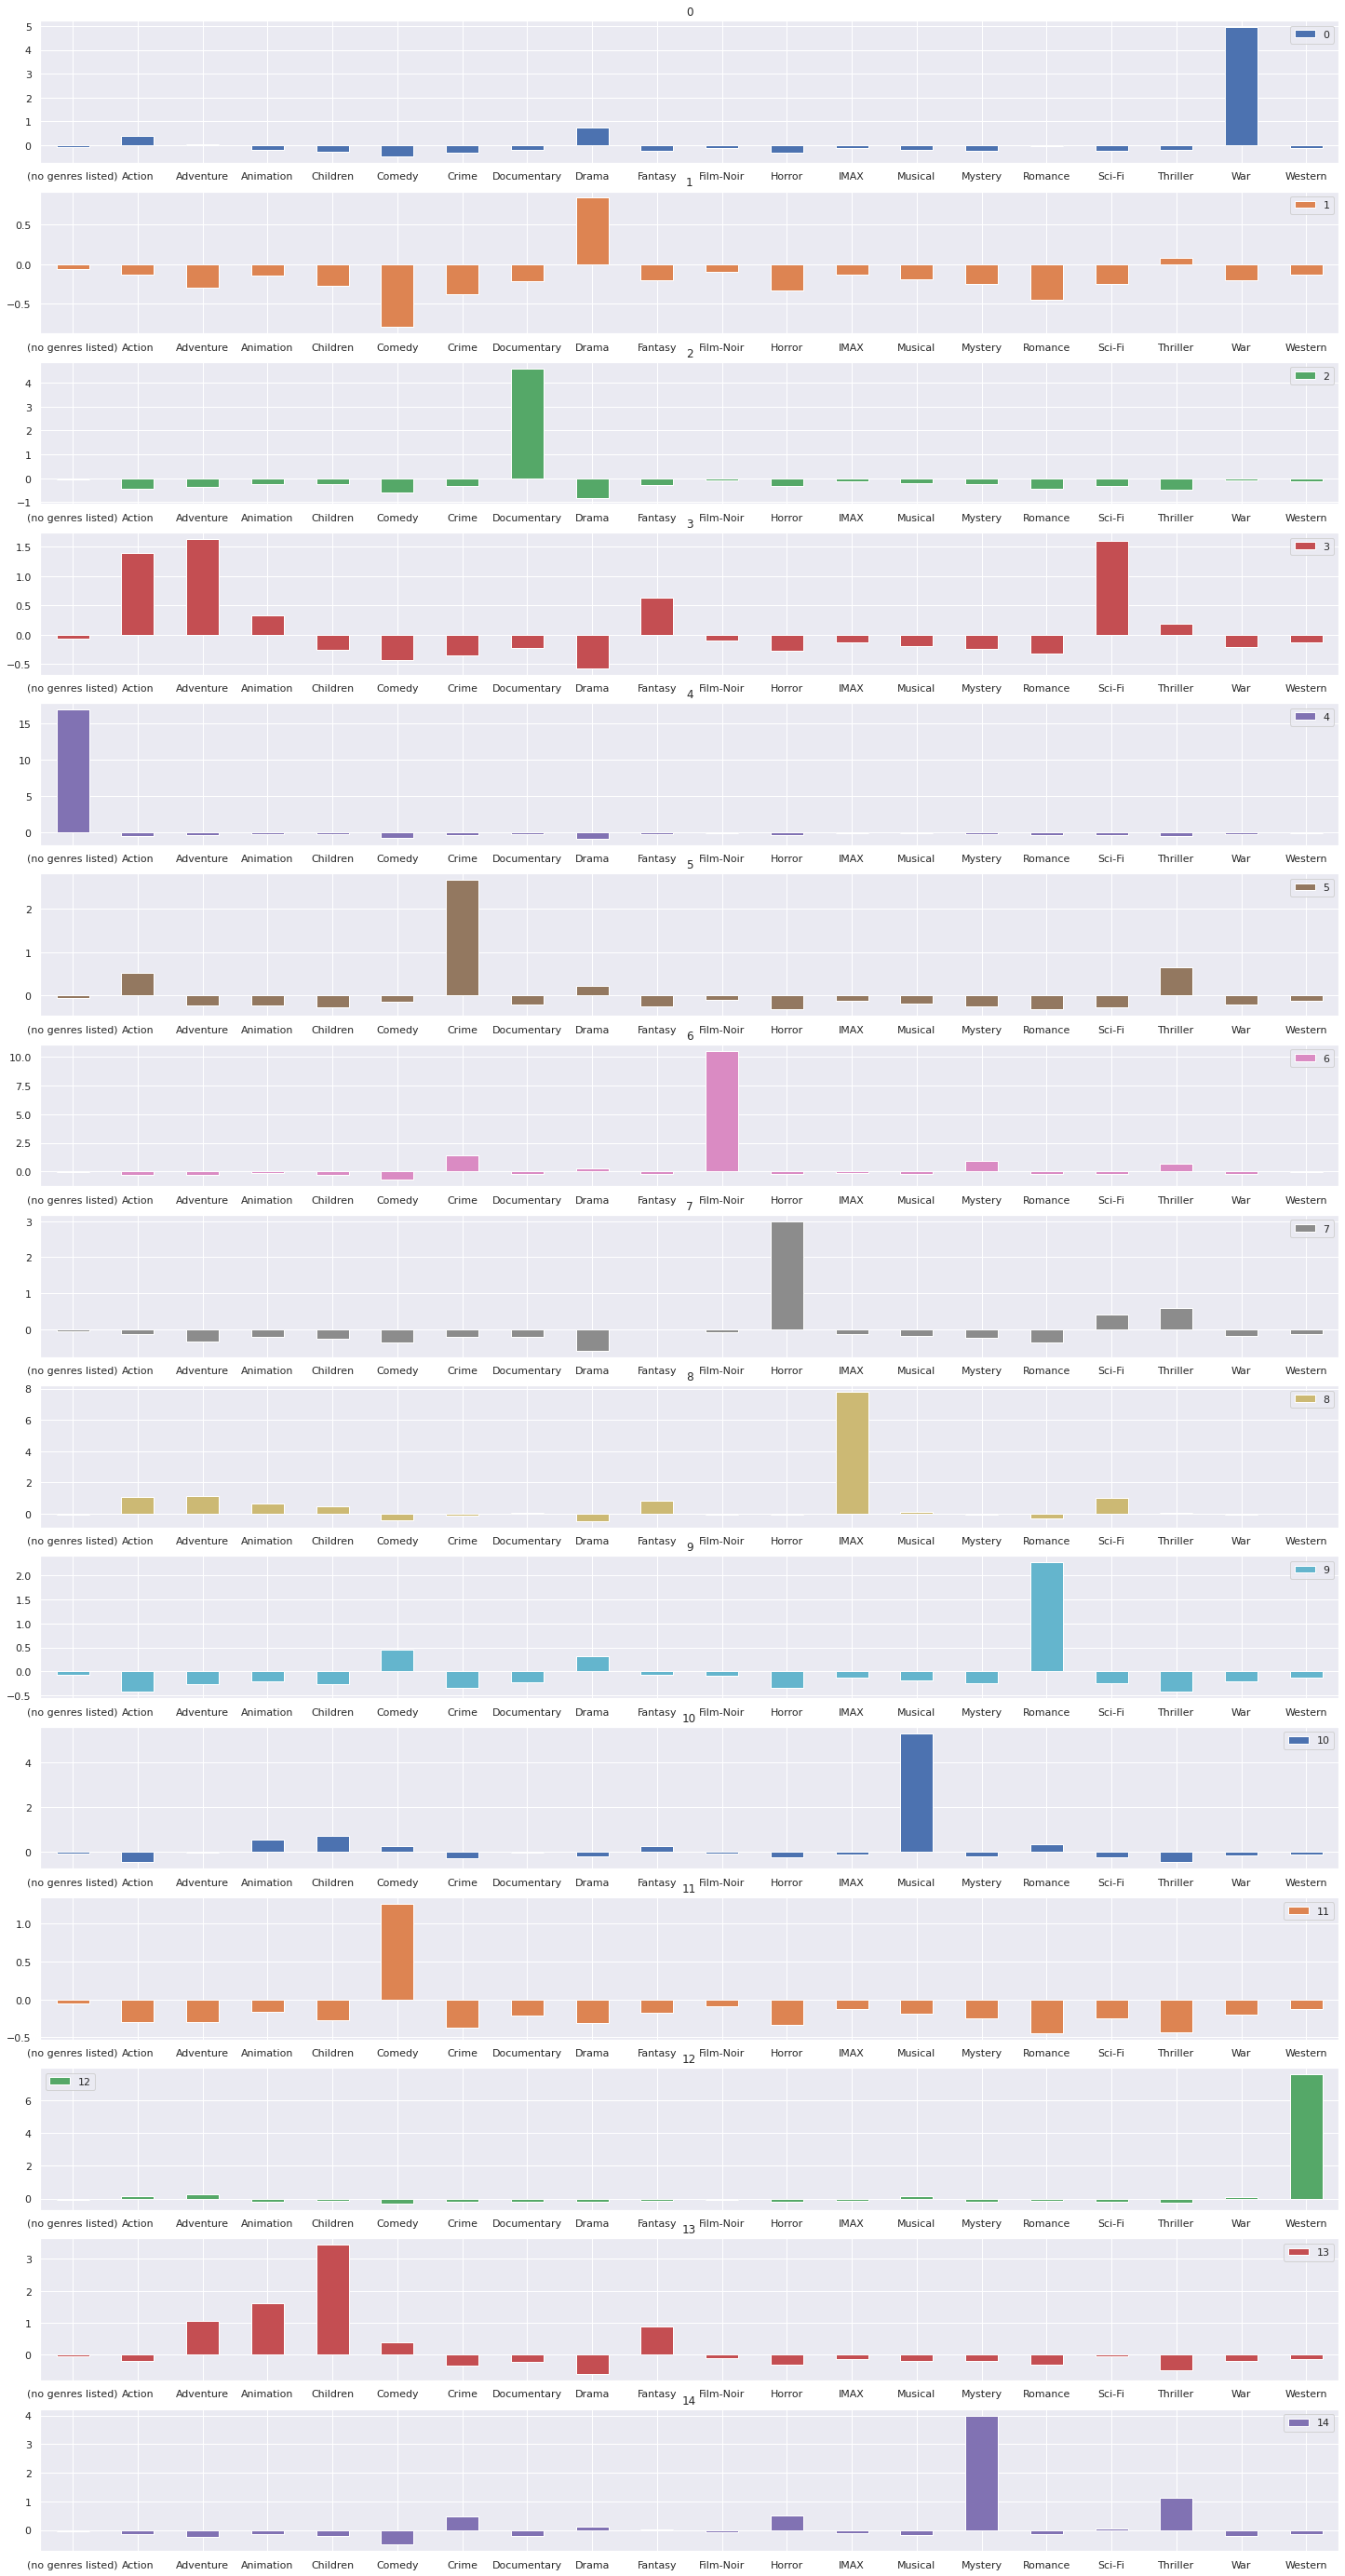

In [49]:
modelo = KMeans(n_clusters=15)
modelo.fit(scaled_genres)
modelo.cluster_centers_
groups = pd.DataFrame(modelo.cluster_centers_, columns=genres.columns )
groups = groups.transpose()
groups.plot.bar(subplots = True, figsize = (25, 50), sharex =False , rot = 0)

In [50]:
matriz_de_distancia = linkage(groups)

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'b'],
 'dcoord': [[0.0, 1.2940314907238046, 1.2940314907238046, 0.0],
  [0.0, 0.9149691340397926, 0.9149691340397926, 0.0],
  [0.0, 1.3095091184200292, 1.3095091184200292, 0.9149691340397926],
  [1.2940314907238046,
   1.4918446810805044,
   1.4918446810805044,
   1.3095091184200292],
  [0.0, 1.939110031655269, 1.939110031655269, 1.4918446810805044],
  [0.0, 2.4632730177386413, 2.4632730177386413, 0.0],
  [1.939110031655269,
   2.4855297912382874,
   2.4855297912382874,
   2.4632730177386413],
  [0.0, 2.524589686267039, 2.524589686267039, 2.4855297912382874],
  [0.0, 2.589200715488136, 2.589200715488136, 2.524589686267039],
  [0.0, 2.7382292568805124, 2.7382292568805124, 2.589200715488136],
  [0.0, 2.9263047897670464, 2.9263047897670464, 2.7382292568805124],
  [0.0, 3.2297369511930105, 3.2297369511930105, 2.9263047897670464],
  [0.0, 4.6103466611

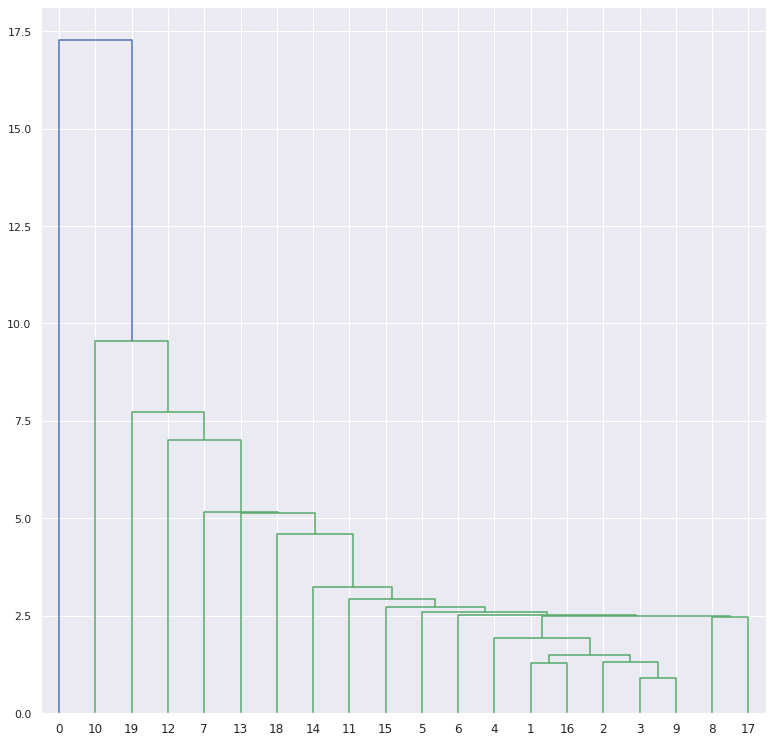

In [51]:
dendrogram(matriz_de_distancia)